In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


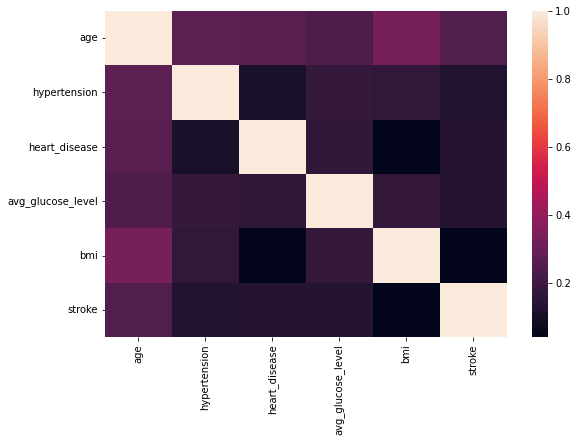

In [172]:
import seaborn as sn
# reparse the numpy matrix to df

df.drop(['id'], axis = 1, inplace=True) 
df_copy = df.copy()
correlation = df_copy.corr()
_, _ = plt.subplots(figsize=(9, 6))
sn.heatmap(correlation, annot=False)
plt.show()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


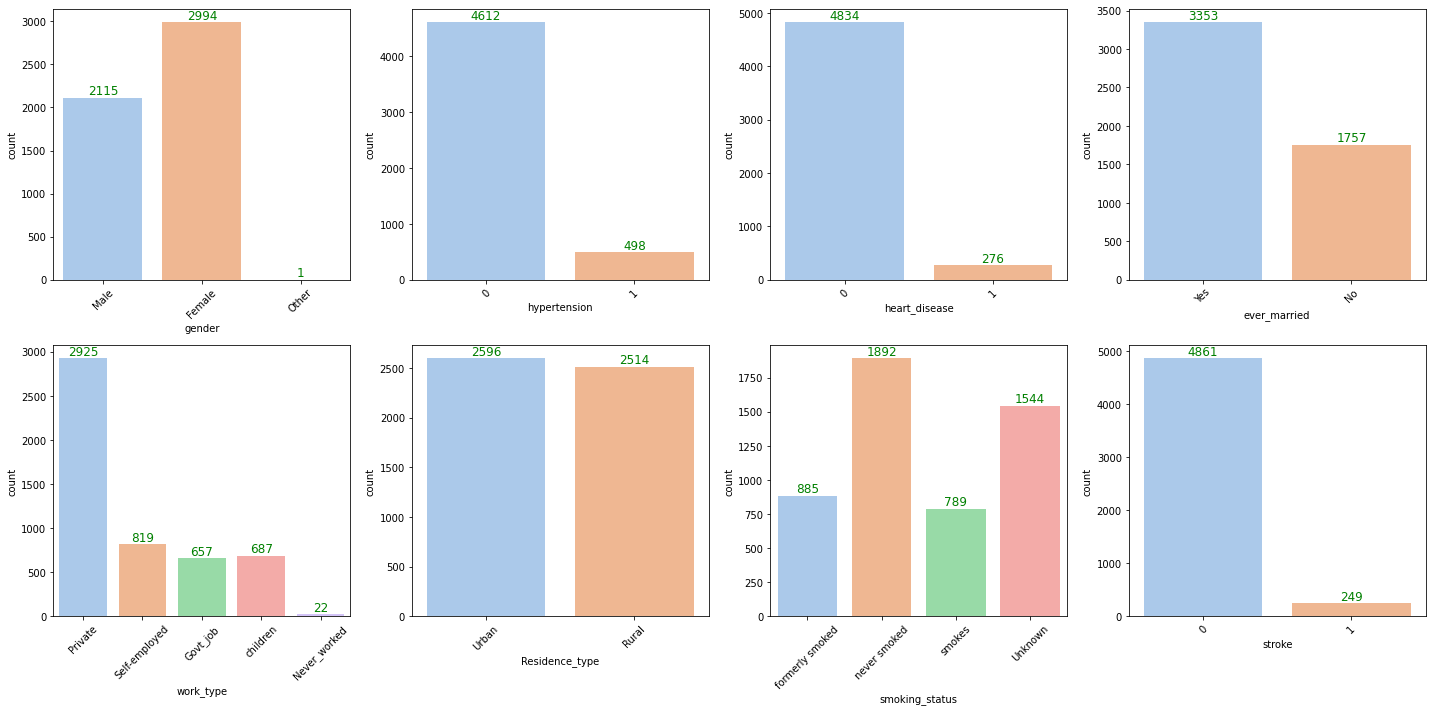

In [174]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axs = np.ravel(axs)

for i, col in enumerate(categorical_columns):
    plt.sca(axs[i])
    countplot = sn.countplot(data=df, x=col, palette="pastel")
    for box in countplot.patches:
        plt.annotate(f"{box.get_height()}", (box.get_x()+rect.get_width()/2, box.get_height()), ha='center', va='bottom', fontsize=12, color='g')

    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [176]:
mapped_columns = ['gender', 'ever_married', 'Residence_type']

gender_map = {'Female':0, 'Male':1}
ever_married_map = {'Yes':1, 'No':0}
residence_type_map = {'Rural':0, 'Urban':1}

df['gender']= df['gender'].map(gender_map)
df['ever_married'] = df['ever_married'].map(ever_married_map)
df['Residence_type'] = df['Residence_type'].map(residence_type_map)

In [177]:
has_nan = {}
for column in numerical_columns:
    if df[column].isnull().values.any():
        has_nan[column] = True

has_nan

{'bmi': True}

In [178]:
for column in has_nan:
    print(len(df[column].isnull().values))

5110


## Analysis
- Only one "other" gender, we can drop these samples
- Only BMI has NaN, fill this with a Linear predictor using closed form solution

In [179]:
len(df[(df['work_type'] == 'Never_worked') & (df['stroke'] == 1)])

0

## Analysis
- 0 stroke from "Never Worked", also drop these samples

In [180]:
df = df[df['gender'] != 'Other']
df = df[df['work_type'] != 'Never_worked']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5087 non-null   float64
 1   age                5088 non-null   float64
 2   hypertension       5088 non-null   int64  
 3   heart_disease      5088 non-null   int64  
 4   ever_married       5088 non-null   int64  
 5   work_type          5088 non-null   object 
 6   Residence_type     5088 non-null   int64  
 7   avg_glucose_level  5088 non-null   float64
 8   bmi                4887 non-null   float64
 9   smoking_status     5088 non-null   object 
 10  stroke             5088 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 477.0+ KB


# Analysis
- Next we fill NaN

In [181]:
male_female_bmi = df.groupby(['gender'])['bmi'].agg(['mean', 'median']).values
df.bmi[df.gender==1].fillna(male_female_bmi[0][1], inplace=True)
df.bmi[df.gender==0].fillna(male_female_bmi[0][0], inplace=True)

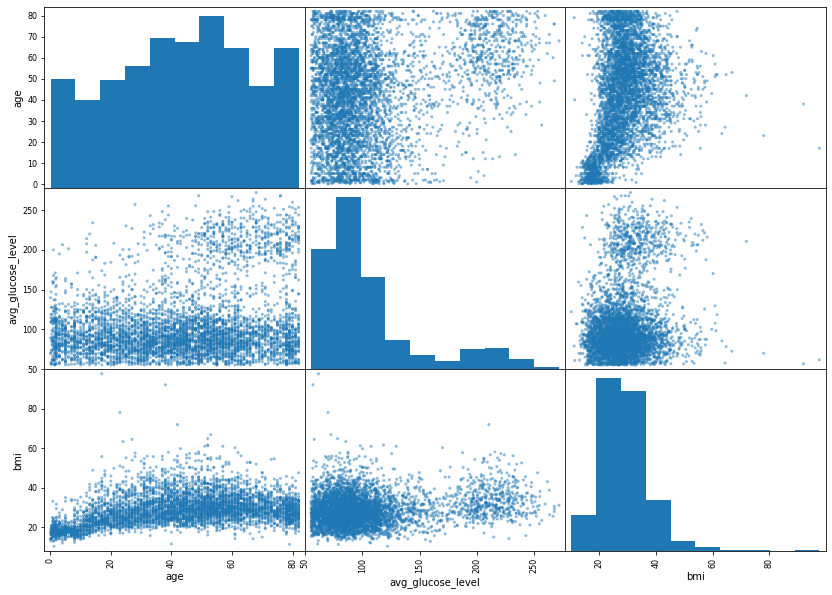

In [182]:
from pandas.plotting import scatter_matrix

# headers = list(df.columns.values)
# df_headers = pd.DataFrame(X_clean, columns=headers)
axs = scatter_matrix(df_filled[numerical_columns], figsize=(14, 10))

In [184]:
from sklearn.preprocessing import StandardScaler


X = df.drop('stroke', axis=1)
y = df['stroke'].values

X = pd.get_dummies(X, drop_first=True)
# columns_to_scale = ['age', 'avg_glucose_level', 'bmi'
# data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5087 non-null   float64
 1   age                             5088 non-null   float64
 2   hypertension                    5088 non-null   int64  
 3   heart_disease                   5088 non-null   int64  
 4   ever_married                    5088 non-null   int64  
 5   Residence_type                  5088 non-null   int64  
 6   avg_glucose_level               5088 non-null   float64
 7   bmi                             4887 non-null   float64
 8   work_type_Private               5088 non-null   uint8  
 9   work_type_Self-employed         5088 non-null   uint8  
 10  work_type_children              5088 non-null   uint8  
 11  smoking_status_formerly smoked  5088 non-null   uint8  
 12  smoking_status_never smoked     50

## Analysis
- Above we can see some decent amount of correlation between the data points

In [168]:
from sklearn.model_selection import train_test_split
import time

from sklearn.linear_model import LinearRegression

def clean_and_arrange(df_in, y, name):
    X = df_in.to_numpy()
    
    print(f'X shape: {X.shape}')
    print(f'y shape: {y.shape}')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=int(time.time()), stratify=y)
    
    scaler = StandardScaler()
    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # give y_train the same shape so it can be concatenated
    y_train = np.resize(y_train, (len(y_train),1))
    # add it back to X_train as the lables
    X_train_full = np.concatenate((X_train, y_train), 1)
    X_train_scaled_full = np.concatenate((X_train_scaled, y_train), 1)
    
    # VALIDATION SET
    # X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.50, random_state=int(time.time()))
    
    # give y_test the same shape so it can be concatenated
    # y_val = np.resize(y_val, (len(y_val),1))
    # add it back to X_test as the lables
    # X_val_full = np.concatenate((X_val, y_val), 1)
    
    # give y_test the same shape so it can be concatenated
    y_test = np.resize(y_test, (len(y_test),1))
    # add it back to X_test as the lables
    X_test_full = np.concatenate((X_test, y_test), 1)   
    X_test_scaled_full = np.concatenate((X_test_scaled, y_test), 1)

    # recombine X, now data is organized - training data precedes the test data
    X_clean = np.concatenate((X_train_full, X_test_full), 0)
    X_scaled_clean = np.concatenate((X_train_scaled_full, X_test_scaled_full), 0)
    
    num_train = np.size(X_train, 0)
    num_test = np.size(X_test, 0)
    
    print(f'train size: {num_train}')
    print(f'train size: {num_test}')
    
    with open(f'datasets/{name}_sizes.csv', 'w') as sample_size_file:
        sample_size_file.writelines(f'{num_train}, {num_test}')
        
    # transpose the matrix so sample is a column
    print(f"writing datasets/{name}_clean.csv") 
    print(f"writing datasets/{name}_scaled_clean.csv") 
    pd.DataFrame(X_clean).T.to_csv(f'datasets/{name}_clean.csv', index = False, index_label = False, header=False)
    pd.DataFrame(X_scaled_clean).T.to_csv(f'datasets/{name}_scaled_clean.csv', index = False, index_label = False, header=False)
    
    return X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test #, num_val)

In [169]:
X_train, X_train_scaled, X_test, X_test_scaled, y_train, y_test = clean_and_arrange(X, y, 'stroke')

X shape: (5088, 14)
y shape: (5088,)
train size: 4070
train size: 1018
writing datasets/stroke_clean.csv
writing datasets/stroke_scaled_clean.csv


In [166]:
# from sklearn.linear_model import LogisticRegression
# 
# def show_model_results(model):
#     """A simple function to show a model results"""
#     print(f"{model.__class__.__name__:*^50}\n")
#     model.fit(X_train_scaled, y_train)
#     print(f"Train Acc.: {model.score(X_train_scaled, y_train)*100:.2f}%")
#     print(f"Test Acc.: {model.score(X_test_scaled, y_test)*100:.2f}%")
#     x = "Confusion Matrix"
#     print(f"\n{x:*^30}\n")
#     print(metrics.confusion_matrix(y_test, model.predict(X_test_scaled)))
#     
# 
# log_reg = LogisticRegression()
# show_model_results(log_reg)

****************LogisticRegression****************



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').